<h1><center>Projet ACV</center></h1>

# Imports

In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Filtres Canny

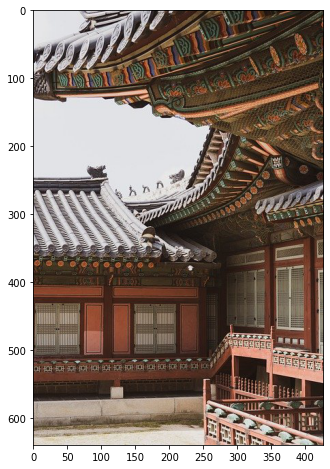

In [67]:
image = plt.imread('palace.jpg')

fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(image)

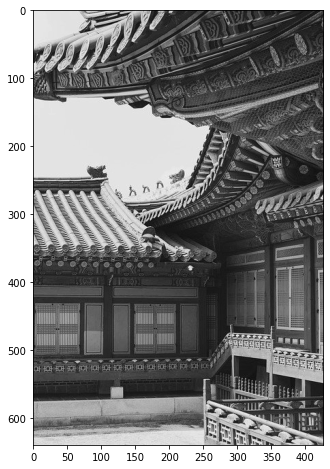

In [68]:
#To use Canny, we need to convert our image to grayscale,
img_grey = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)  # Réduit à seul canal
fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(img_grey, cmap='gray')

plt.savefig('palais_grey.png')

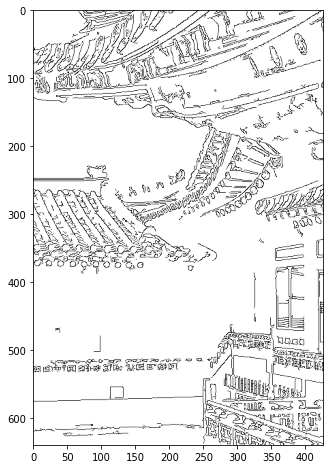

In [69]:
img_edge = cv2.Canny(img_grey, 150, 500)

fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(img_edge, cmap='Greys')

plt.savefig('palais_contours.png')

# Convolution

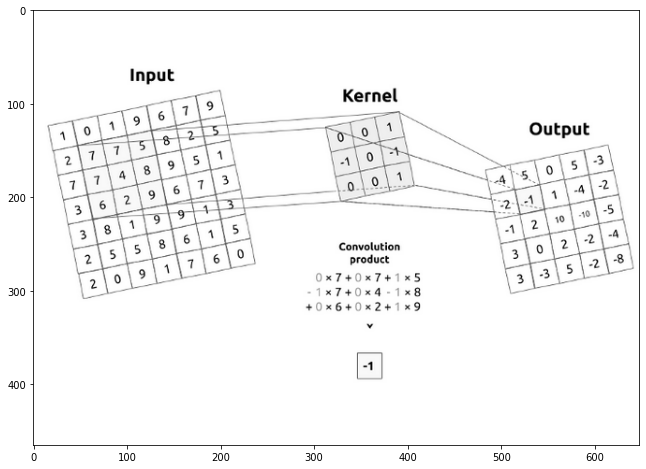

In [70]:
img_conv = plt.imread('convolution.png')

fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(img_conv)

Canny Edge Detection is an algorithm used to extract edges from images.

Param:
- Performs noise reduction with a Gaussian Blur;
- Gets the gradient direction and magnitude with a Sobel kernel.
- Laplacien

Filtre Gaussien: Lissage d'image

Sobel kernel: The operator uses two 3×3 kernels which are convolved with the original image to calculate approximations of the derivatives – one for horizontal changes, and one for vertical. 
Calculation of   Sobelx                      Sobely
                -1  0  1                     1  2  1
                -2  0  2                     0  0  0
                -1  0  1                    -1 -2 -1

Laplacian Kermel: use one 3x3 kermel
                            0  1  0
                            1 -4  1
                            0  1  0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


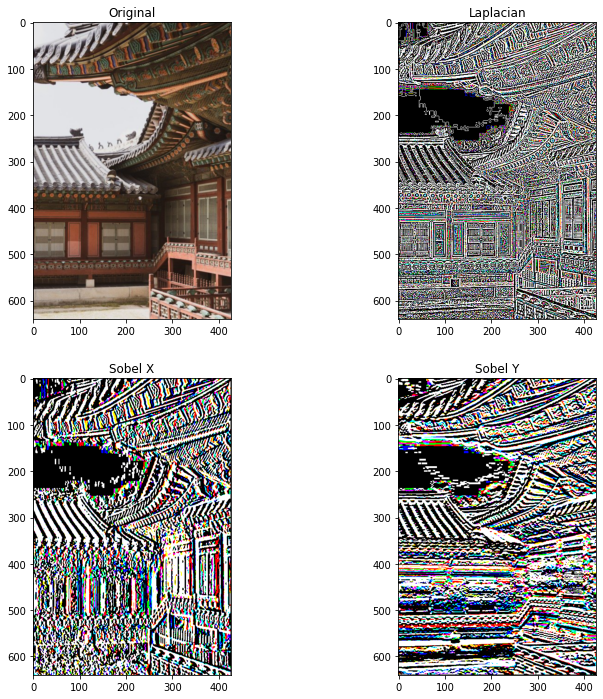

<Figure size 432x288 with 0 Axes>

In [71]:
# remove noise
img = cv2.GaussianBlur(image,(3,3),0)  # Lissage d'image (Image Smoothing) pour réduir le bruit

# convolute with proper kernels
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y

fig, ax = plt.subplots(1, figsize=(12,12))

plt.subplot(2,2,1)
plt.imshow(img,cmap = 'gray')
plt.title('Original')

plt.subplot(2,2,2)
plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian')

plt.subplot(2,2,3)
plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X')

plt.subplot(2,2,4)
plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y')

plt.show()

plt.savefig('sobel_laplacian.png')


In [ ]:
def sobel(A): 
    # INPUT :two dimensional image array
    Gx = np.array([[-1, 0 ,1],[-2 ,0 ,2],[-1, 0, 1]])
    Gy = np.array([[-1, -2 ,-1],[0 ,0 ,0],[1, 2, 1]])

    rows = A.shape[0]
    columns = A.shape[1]
    mag = zeros(A)

    for i=1:rows-2
        for j=1:columns-2
            S1 = sum(sum(Gx.*A(i:i+2,j:j+2)))
            S2 = sum(sum(Gy.*A(i:i+2,j:j+2)))

            mag(i+1, j+1) = sqrt(S1.^2+S2.^2)
        end for
    end for

    threshold = 70 %varies for application [0 255]
    output_image = max(mag, threshold)
    output_image(output_image == round(threshold)) = 0;
    return output_image
end function
